# Tutorial 1
This contains my attempt at tutorial 1.

This is the first time I used Google Colabs, so I'm not entirely convinced about it, especially since it **knows** how to import functions for you.

# Libraries

In [1]:
# mathematical
import numpy as np

# plotting
import matplotlib.pyplot as plt

# data examples 
from sklearn import datasets

In [2]:
np.random.seed(42) # set random seed

In [3]:
X, y = datasets.make_classification(100, n_features = 2, n_redundant= 0)

In [4]:
# X[i] refers to the row, i.e. the index of the datapoint (not the feature!)
# X[i,:] does the same as above
# X[i][j] refers to a row i, feature j
# X[i,j] does the same as above
# X[:,j] gives you all the values in feature j

In [5]:
y[:5] # has created two clusters for our data (this is because of n_classes = 2 by default)

array([0, 1, 0, 0, 1])

In [6]:
X[:,0] = X[:,0]*0.5 + 5
X[:,1] = X[:,1]*30 + 160

Text(0, 0.5, 'Brightness')

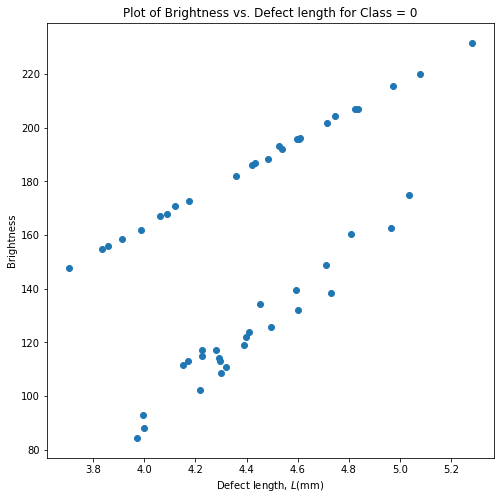

In [7]:
# plot data

fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(
    X[y==0, 0],
    X[y==0,1]
)
plt.title('Plot of Brightness vs. Defect length for Class = 0')
plt.xlabel('Defect length, $L (\mathrm{mm})$')
plt.ylabel('Brightness')

Text(0, 0.5, 'Brightness')

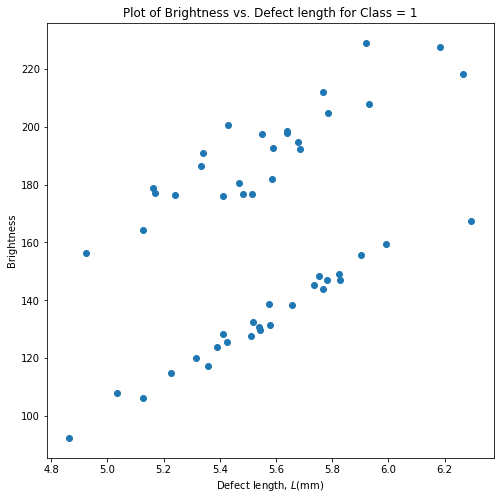

In [8]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(
    X[y==1, 0],
    X[y==1,1]
)
plt.title('Plot of Brightness vs. Defect length for Class = 1')
plt.xlabel('Defect length, $L (\mathrm{mm})$')
plt.ylabel('Brightness')

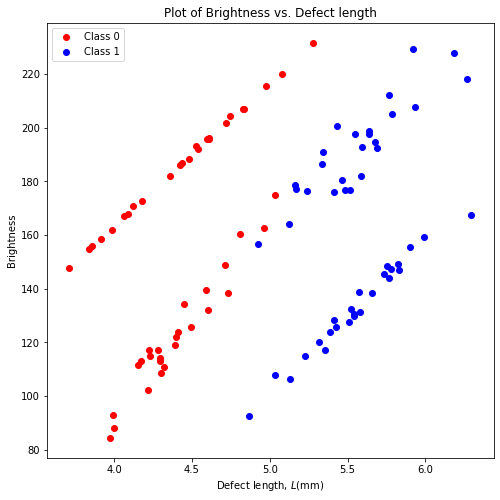

In [9]:
fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(
    X[y==0, 0],
    X[y==0,1],c='r'
)
ax.scatter(
    X[y==1, 0],
    X[y==1,1],c='b'
)
plt.title('Plot of Brightness vs. Defect length')
plt.xlabel('Defect length, $L (\mathrm{mm})$')
plt.ylabel('Brightness')
plt.legend(['Class 0','Class 1'])

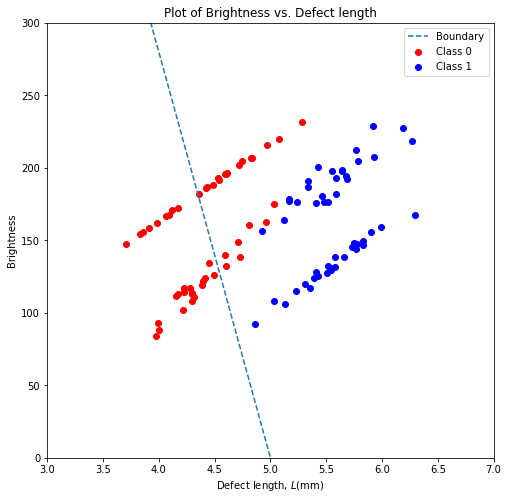

In [10]:
x1 = np.linspace(3,8,100)
x2 = -280*x1 + 1400


fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(
    X[y==0, 0],
    X[y==0,1],c='r'
)
ax.scatter(
    X[y==1, 0],
    X[y==1,1],c='b'
)

ax.plot(
    x1,
    x2,
    '--'
)
plt.xlim([3,7])
plt.ylim([0,300])
plt.title('Plot of Brightness vs. Defect length')
plt.xlabel('Defect length, $L (\mathrm{mm})$')
plt.ylabel('Brightness')
plt.legend(['Boundary','Class 0','Class 1'])

# Calculating the covariance

In [11]:
def get_cov ( sdx=1, sdy=1, theta =0):
  """
  a function that outputs a 2x2 covariance matrix based on the standard deviations of the inputs, sdx and sdy.
  The function also allows rotation by theta degrees 
  """
  covar = np.array(
      [[sdx, 0],
       [0, sdy]]
  )

  rotated, rot_mat = rotate_matrix(covar, theta)
  covar = np.matmul(rotated, rot_mat.T)

  return covar

def rotate_matrix(array, theta):
  theta = theta / 360*2*np.pi
  rot_mat = np.array(
      [[np.cos(theta), -np.sin(theta)],
       [np.sin(theta), np.cos(theta)]]
  )
  return np.matmul(rot_mat, array), rot_mat

# Plotting the distribution

In [12]:
x1_line = np.linspace(-1,1, 200)
x2_line = np.linspace(-1,1, 200)

x1_grid, x2_grid = np.meshgrid(x1_line, x2_line)
X_grid = np.array([x1_grid, x2_grid]).reshape(2, 40000).T
X_grid

array([[-1.        , -1.        ],
       [-0.98994975, -1.        ],
       [-0.9798995 , -1.        ],
       ...,
       [ 0.9798995 ,  1.        ],
       [ 0.98994975,  1.        ],
       [ 1.        ,  1.        ]])

In [13]:
cov = get_cov(1, 0.1, 30)

(200, 200)


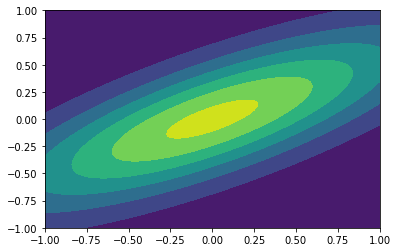

In [16]:
p = 1 / (2 * np.pi * np.sqrt(np.linalg.det(cov))) * np.exp(
-1 / 2 * (np.matmul(X_grid, np.linalg.inv(cov)) * X_grid).sum(-1))

p = p.reshape(200,200)

print(p.shape)

plt.contourf(x1_line, x2_line, p)

# Create a circular distribution

### Revision of polar coordinates

$$ x = r\cos{\theta}$$
$$ y = r\sin{\theta}$$

I will also use this as an opportunity to practice with arrays in numpy, since I'm not fully acquainted with these.

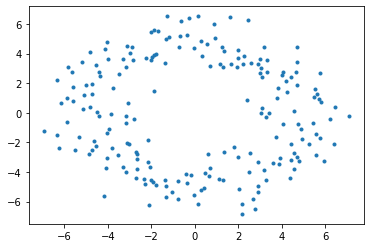

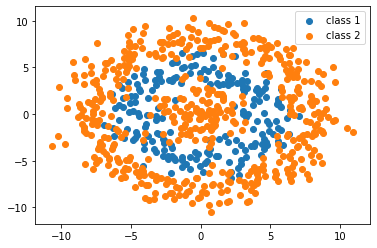

In [15]:
 def generate_circle(mu = 0, sd = 1, n_points = 100):
   theta = np.linspace(0, 2*np.pi, n_points)
   r = np.random.normal(mu, sd, n_points)
   x = r*np.cos(theta)
   y = r*np.sin(theta)
   return x, y


def combine_features(*features):
  X = []
  for feature in features:
    X.append(feature)
  return np.asarray(X).T



# create class 1

x, y = generate_circle(5, 1, 200)
X = combine_features(x,y)
Y = np.asarray([1 for i in range(X.shape[0])])

plt.plot(X[:,0],X[:,1],'.')
plt.show()


# create class 2 

# first part of the class
x, y = generate_circle(2,1,100)
X = np.concatenate((X,combine_features(x,y)), axis = 0) # extend our array
Y = np.concatenate((Y, np.asarray([2 for i in range(x.shape[0])])), axis = 0)

# second part of the class
x, y = generate_circle(8,1, 400)

X = np.concatenate((X, combine_features(x,y)), axis = 0) # extend our array
Y = np.concatenate((Y, np.asarray([2 for i in range(x.shape[0])])), axis = 0)

for y_unique in np.unique(Y):
  plt.scatter(X[Y == y_unique,0],X[Y == y_unique,1])

plt.legend(['class 1', 'class 2'])